# Data Pre-Processing

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/FP Rakamin/train_20D8GL3.csv')

Dataset yang digunakan adalah data train untuk payment default prediction.
Berikut link untuk mengakses datasetnya:
https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv

# Descriptive Statistic

## Memeriksa missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

Dataset ini tidak memiliki missing value.

## Memeriksa duplicated value

In [ ]:
df.duplicated().any()

False

Dataset ini tidak memiliki duplicated value.

## Melihat isi data

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [ ]:
df["ID"].nunique()

21000


## Catatan
* Data ini berisi data 21000 nasabah bank dengan total 21000 baris dan 25 kolom
* Dataset memiliki data categorical dengan tipe data int
* Untuk memudahkan visualisasi , data categorical  akan dirubah kebentuk yang semestinya
* Untuk menyeragamkan, kolom PAY_0 akan diubah menjadi PAY_1
* Variabel target adalah kolom default_payment_next_month dengan tipe data int sementara kolom-kolom lainnya adalah variabel fitur




## Mengubah Tipe Data untuk Data Kategorikal

In [ ]:
# Mengubah tipe data untuk kolom SEX
df['SEX'] = df['SEX'].replace(1, "Male")
df['SEX'] = df['SEX'].replace(2, "Female")

# Menghitung banyak data untuk masing-masing kategori di kolom SEX
df_value_sex = df['SEX'].value_counts().reset_index()
df_value_sex.columns = ["SEX","COUNT"]
df_value_sex

,SEX,COUNT
0,Female,12759
1,Male,8241


In [ ]:
# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sebelum tipe data diubah)
df['EDUCATION'].value_counts()

2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

In [ ]:
# Mengubah tipe data untuk kolom EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace(1, "Graduate_School")
df['EDUCATION'] = df['EDUCATION'].replace(2, "University")
df['EDUCATION'] = df['EDUCATION'].replace(3, "High_School")
df['EDUCATION'] = df['EDUCATION'].replace(4, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(5, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(6, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(0, "Others")

# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sesudah tipe data diubah)
df_value_education = df['EDUCATION'].value_counts().reset_index()
df_value_education.columns = ["EDUCATION","COUNT"]
df_value_education

,EDUCATION,COUNT
0,University,9789
1,Graduate_School,7415
2,High_School,3467
3,Others,329


In [ ]:
# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sebelum tipe data diubah)
df['MARRIAGE'].value_counts()

2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64

In [ ]:
# Mengubah tipe data untuk kolom MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")

# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sesudah tipe data diubah)
df_value_marriage = df['MARRIAGE'].value_counts().reset_index()
df_value_marriage.columns = ["MARRIAGE","COUNT"]
df_value_marriage

,MARRIAGE,COUNT
0,Single,11184
1,Married,9561
2,Divorced,219
3,Unknown,36


In [ ]:
# Mengubah nama kolom PAY_0 menjadi PAY_1
df.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [ ]:
# Memeriksa kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          21000 non-null  int64 
 1   LIMIT_BAL                   21000 non-null  int64 
 2   SEX                         21000 non-null  object
 3   EDUCATION                   21000 non-null  object
 4   MARRIAGE                    21000 non-null  object
 5   AGE                         21000 non-null  int64 
 6   PAY_1                       21000 non-null  int64 
 7   PAY_2                       21000 non-null  int64 
 8   PAY_3                       21000 non-null  int64 
 9   PAY_4                       21000 non-null  int64 
 10  PAY_5                       21000 non-null  int64 
 11  PAY_6                       21000 non-null  int64 
 12  BILL_AMT1                   21000 non-null  int64 
 13  BILL_AMT2                   21000 non-null  in

In [ ]:
# Melihat isi data setelah tipe data kategorikal diubah
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,Female,University,Single,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,Female,Graduate_School,Single,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,Female,University,Married,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,Female,University,Single,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,Male,High_School,Married,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


## Pengelompokan kolom berdasarkan tipe data

Pengelompokan ini bertujuan untuk mempermudah proses analisa data

In [ ]:
# Data kategorikal
category =['SEX','EDUCATION','MARRIAGE']
pay_delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Data numerikal
nums = ['LIMIT_BAL', 'AGE',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

nums1 = ['LIMIT_BAL','AGE']

bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

##Handling Ouliers

Dilihat dari histogram 

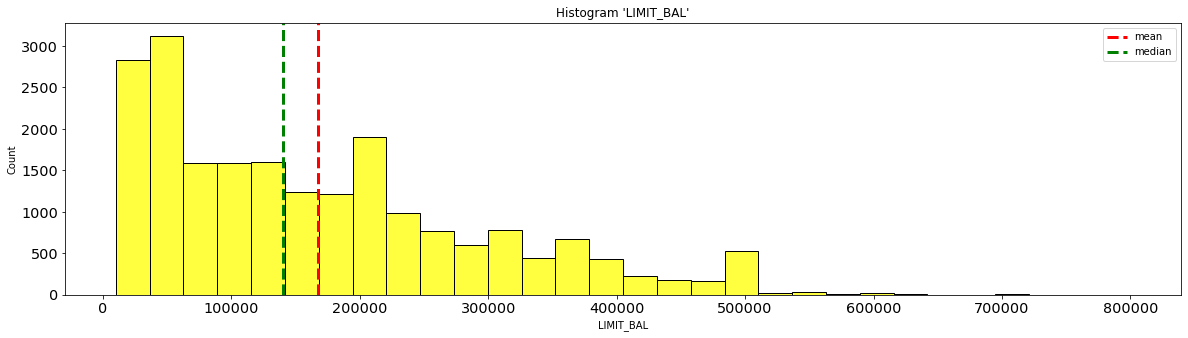

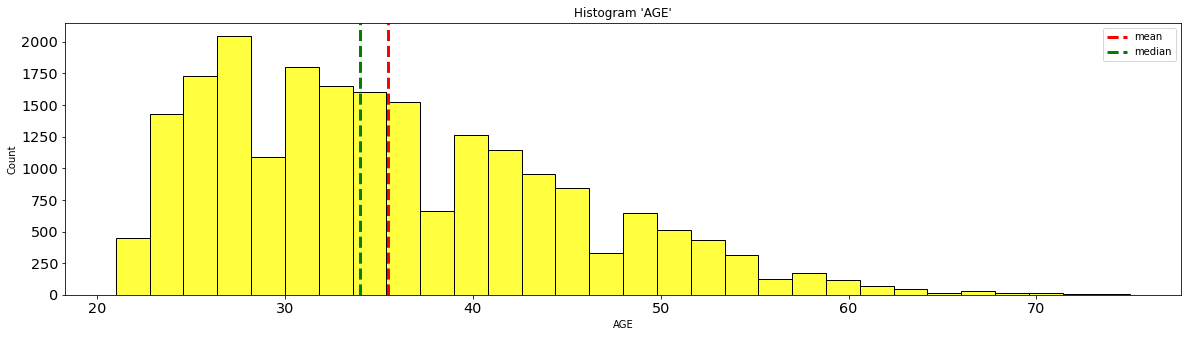

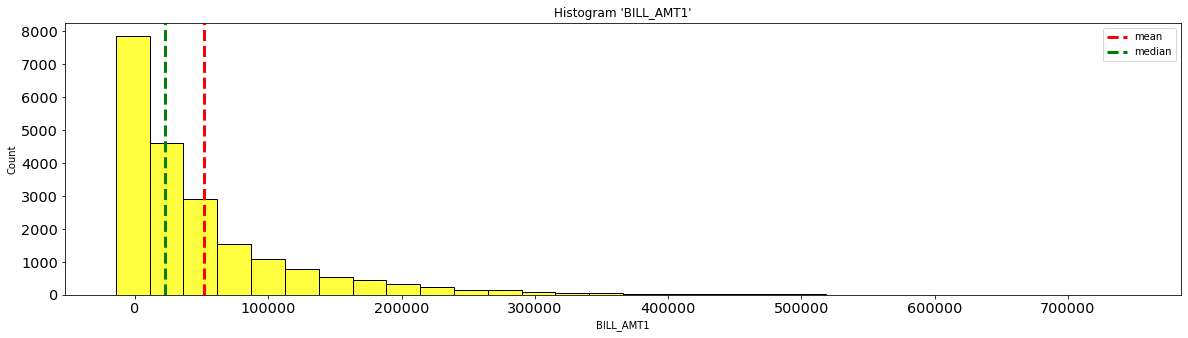

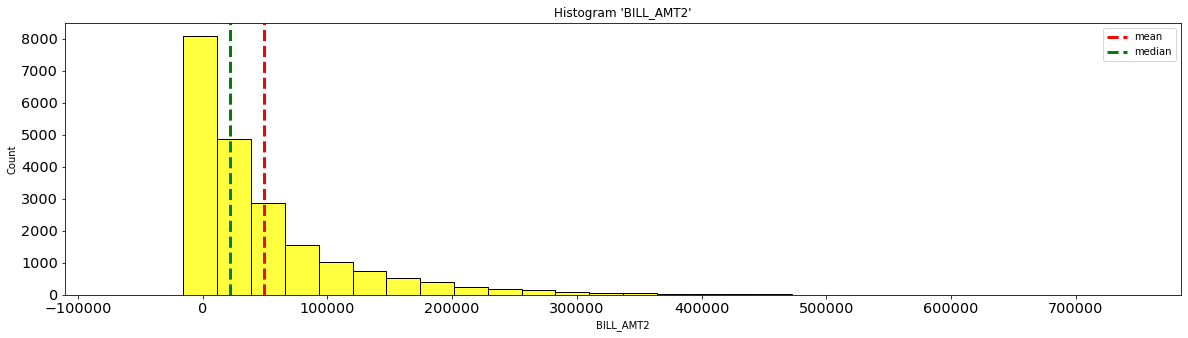

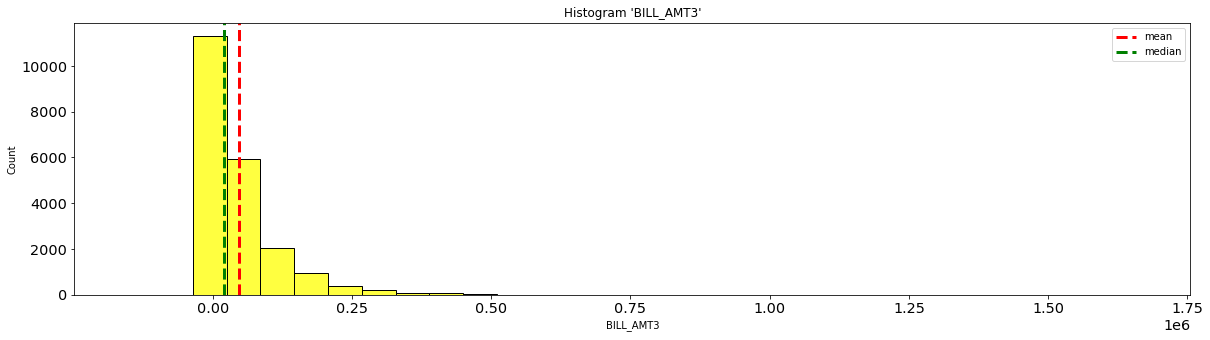

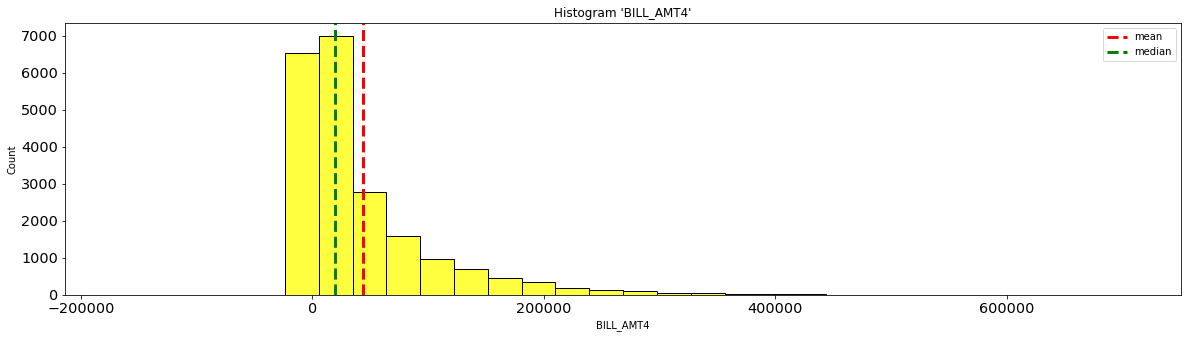

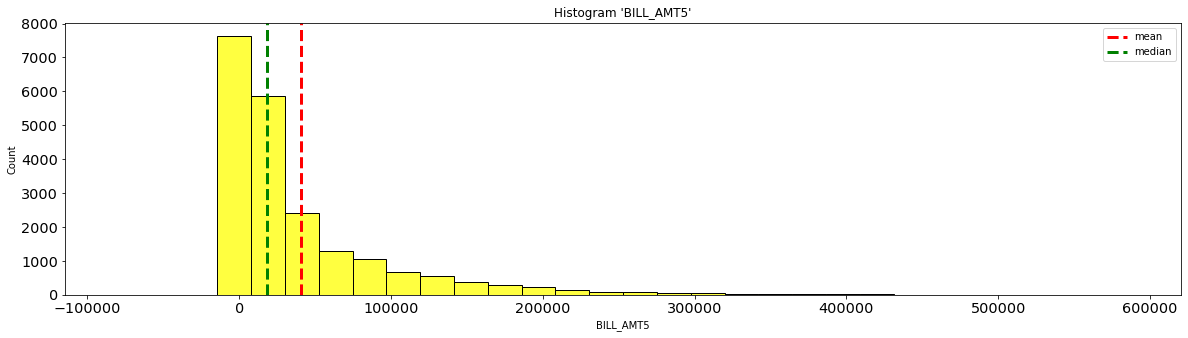

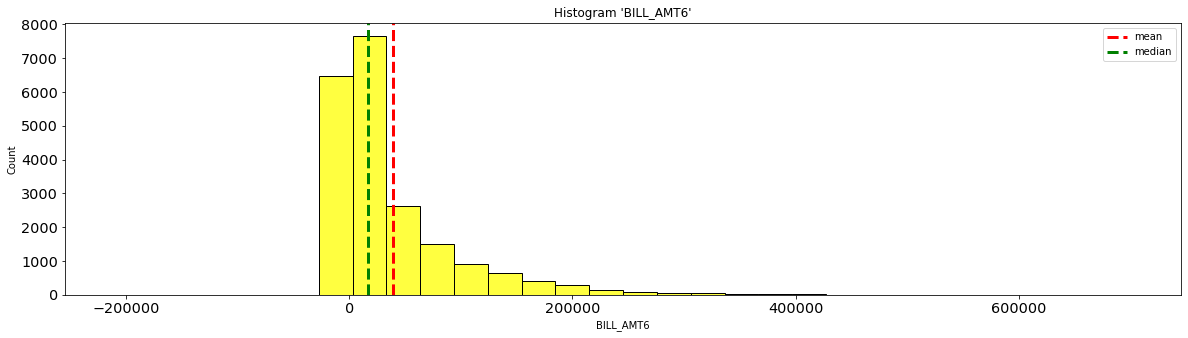

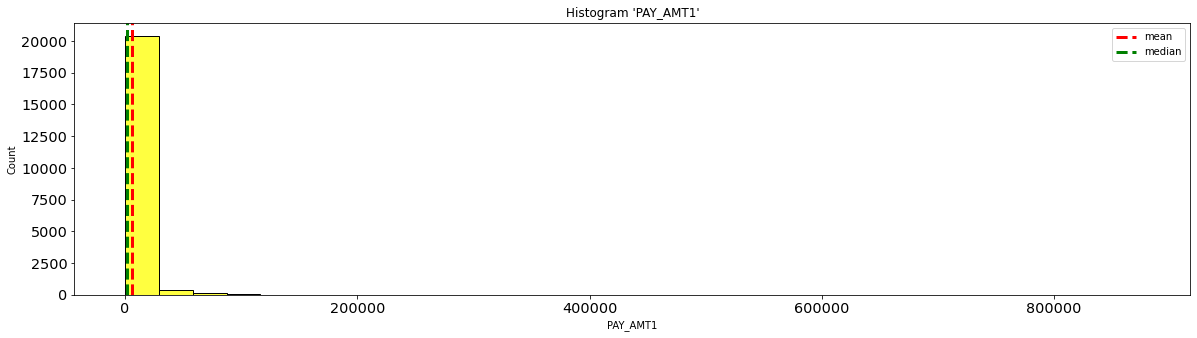

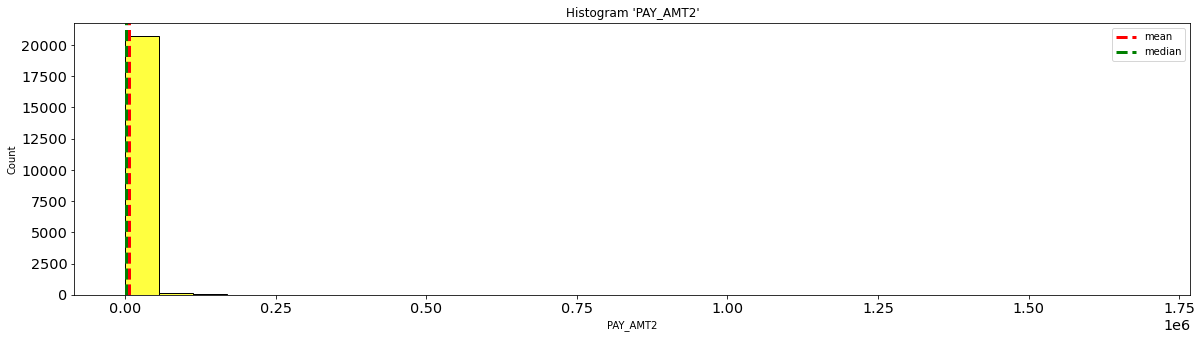

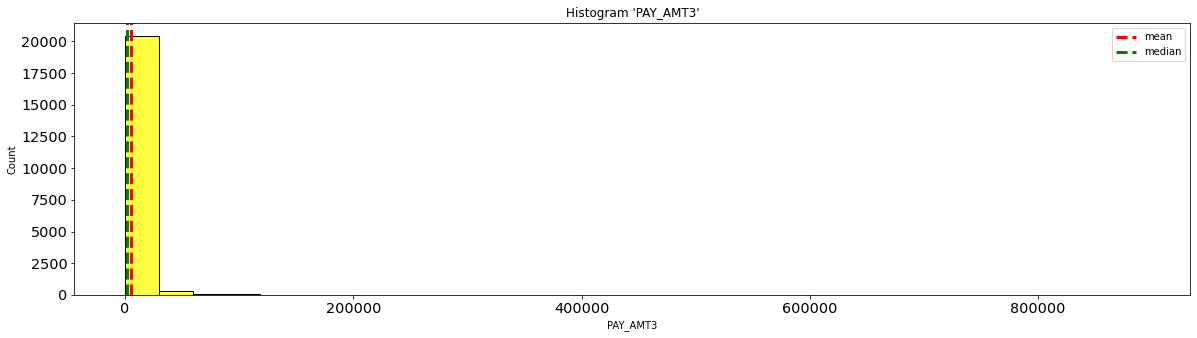

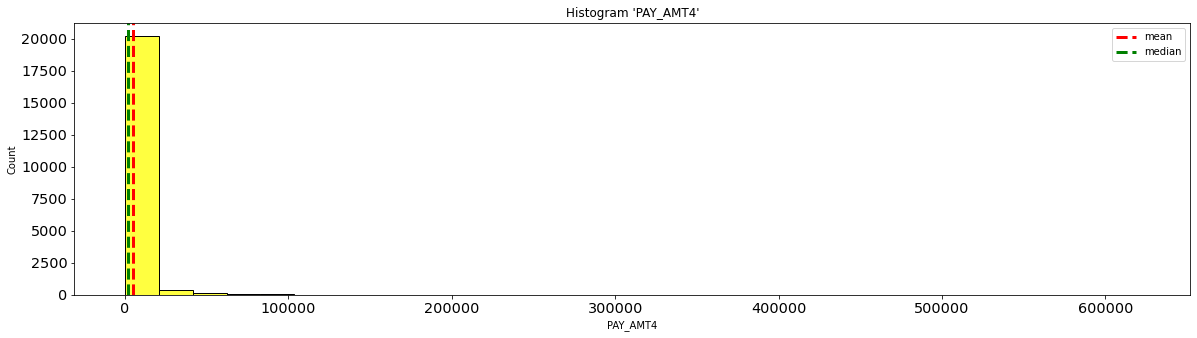

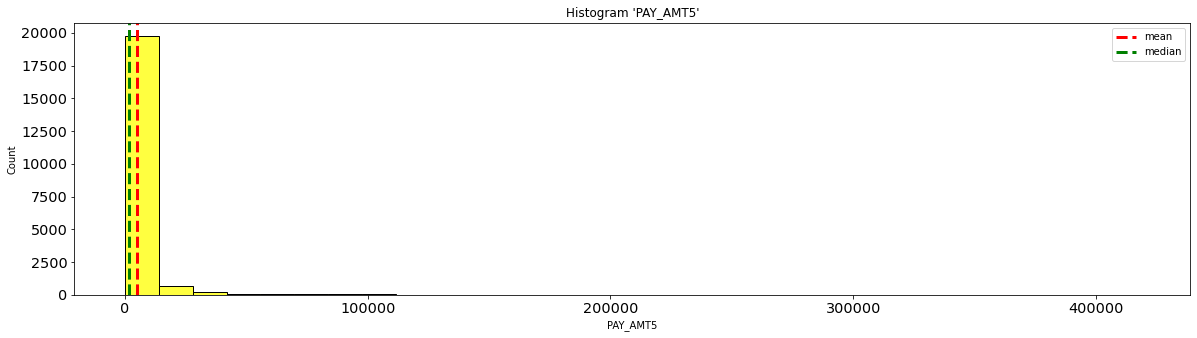

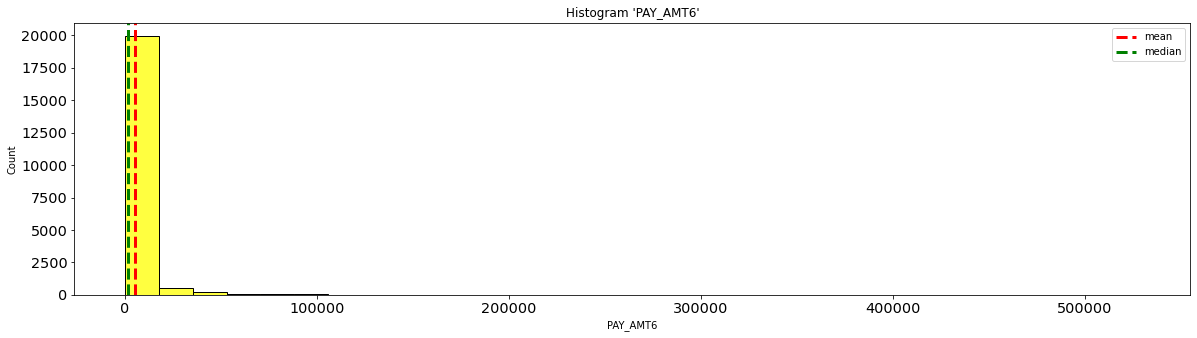

In [ ]:
# histogram
for a in range(0, len(nums)):
  fig, axes = plt.subplots(ncols = 1, figsize = (20, 5))
  sns.histplot(df[nums[a]], bins=30, color ='yellow')
  axes.set_title(f"Histogram '{nums[a]}'")
  axes.axvline(df[nums[a]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
  axes.axvline(df[nums[a]].median(), color = 'green', linestyle = 'dashed', label = 'median')
  axes.legend()

Dilihat dari boxplot

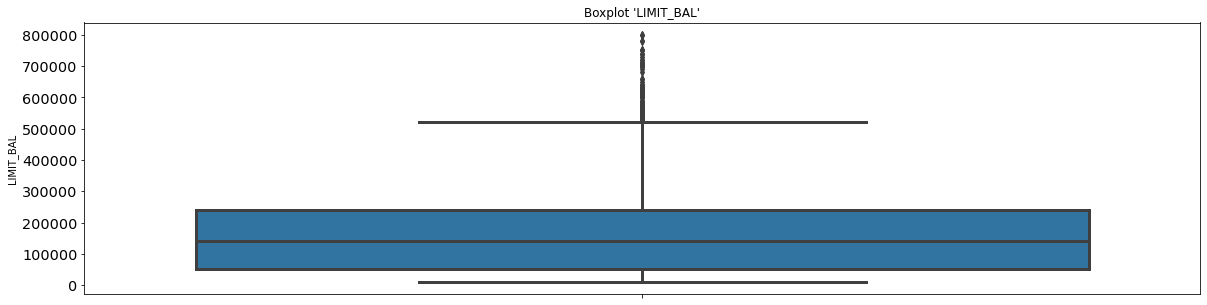

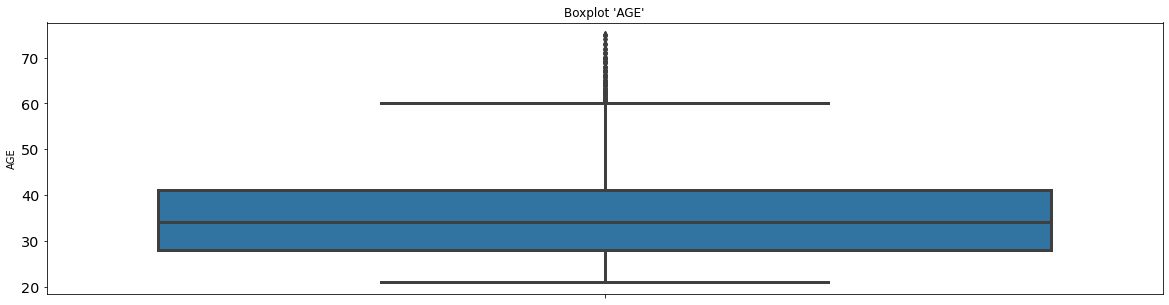

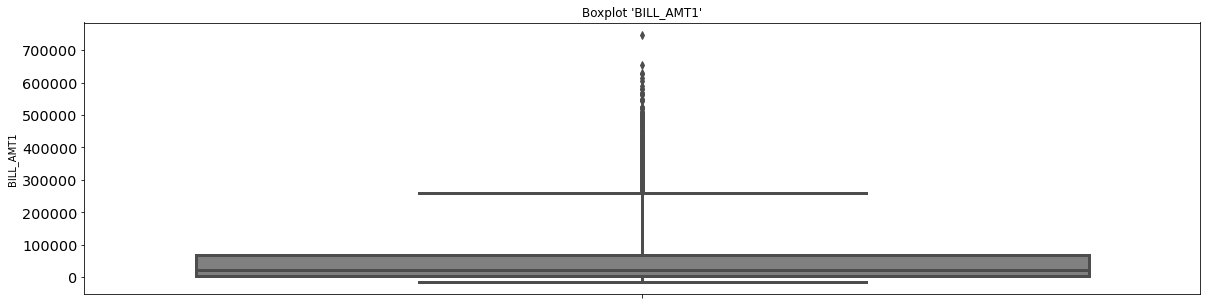

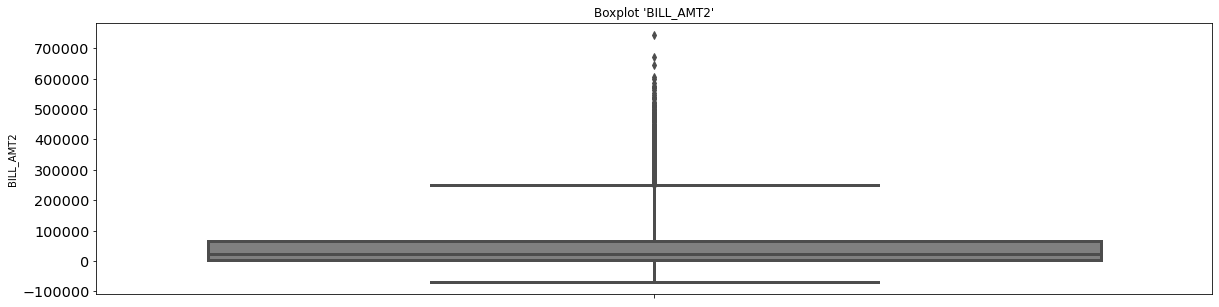

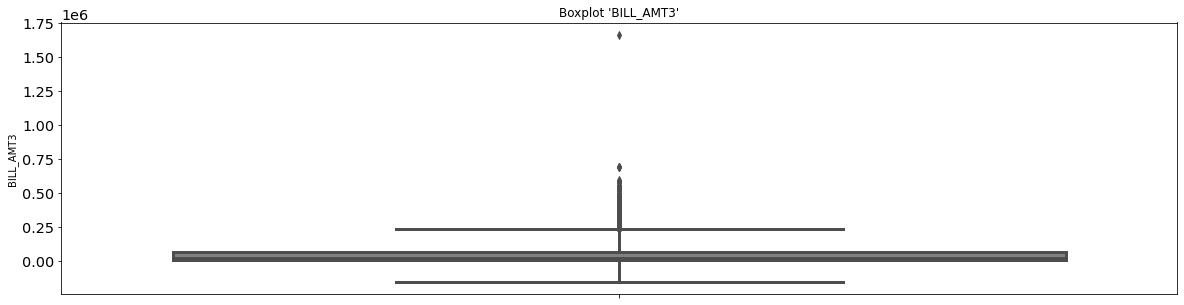

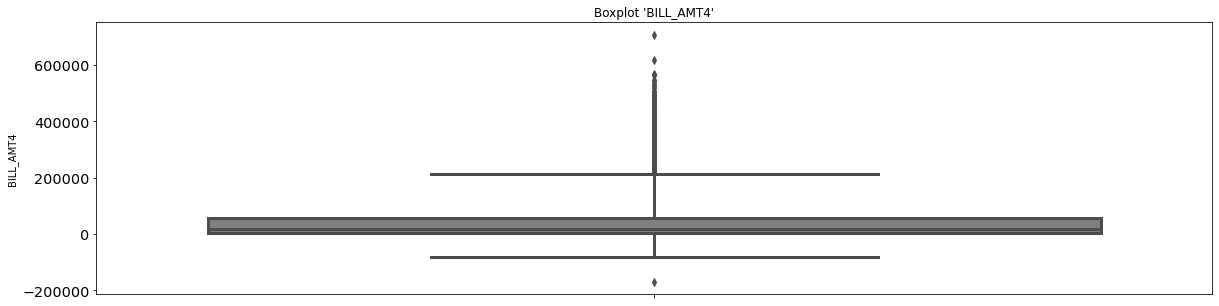

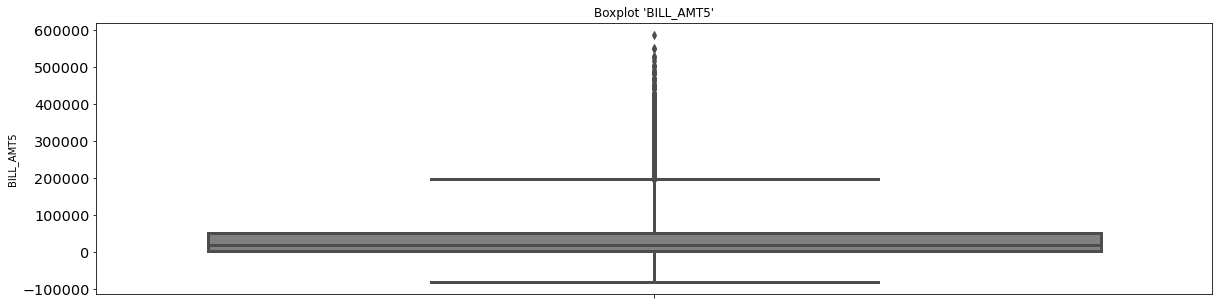

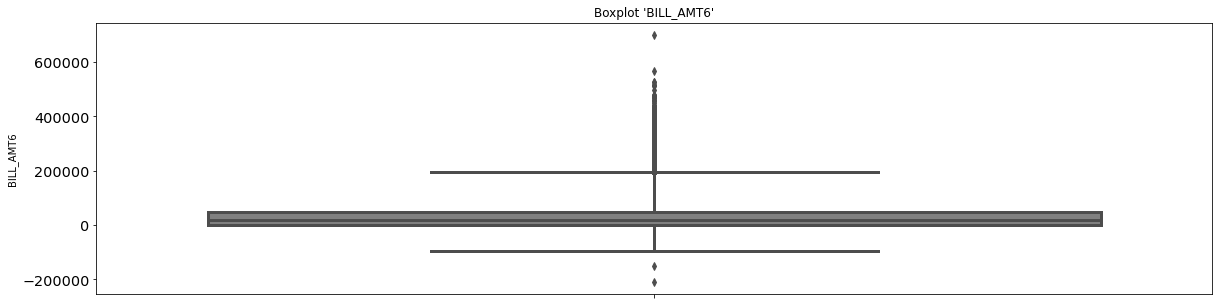

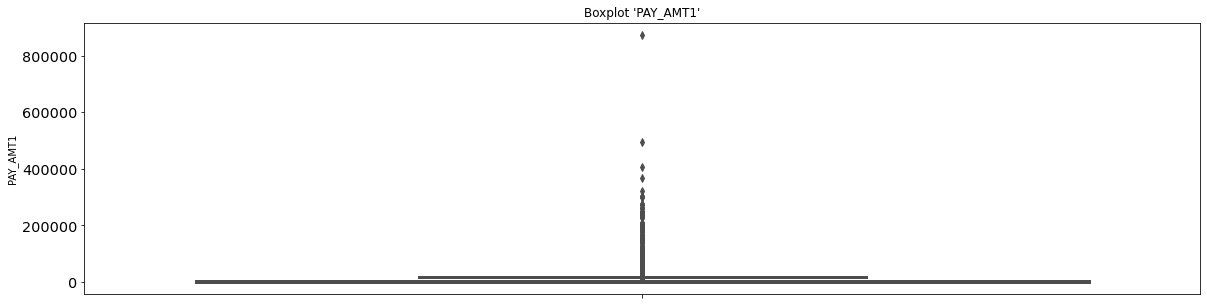

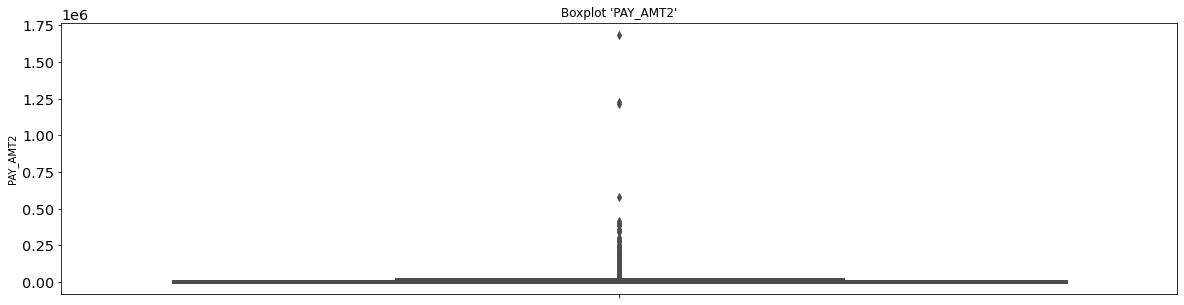

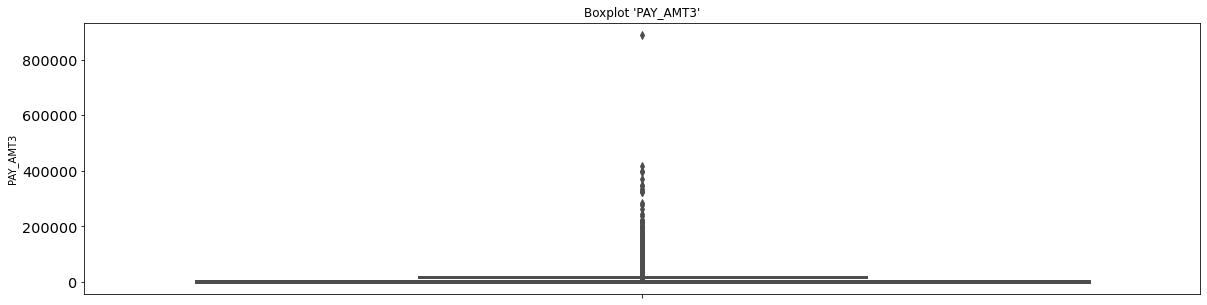

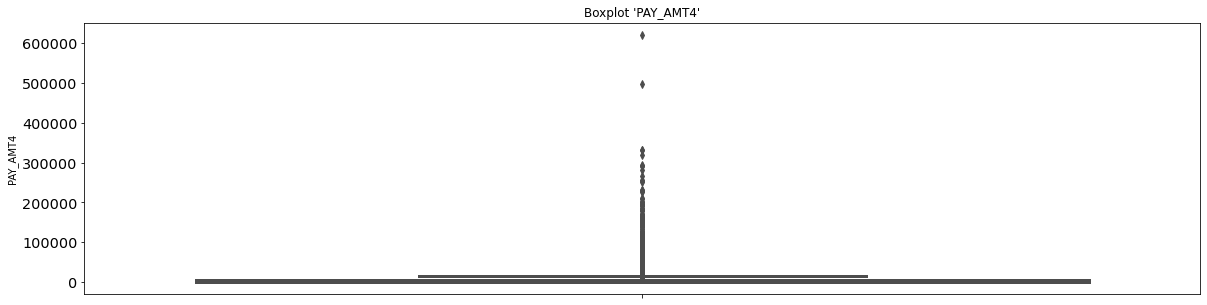

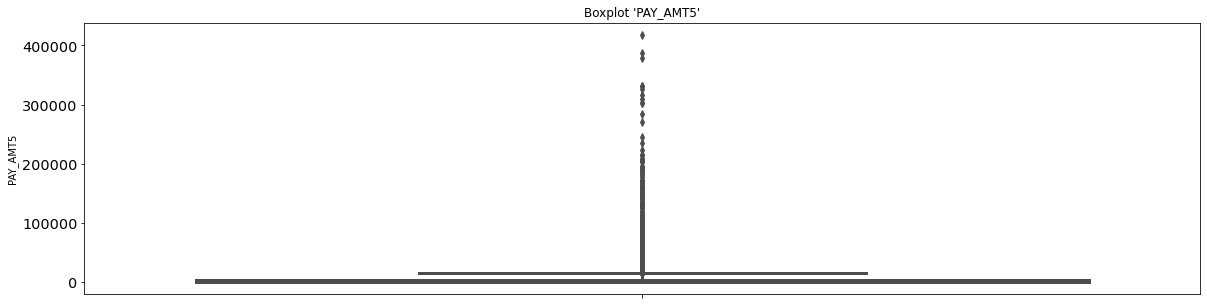

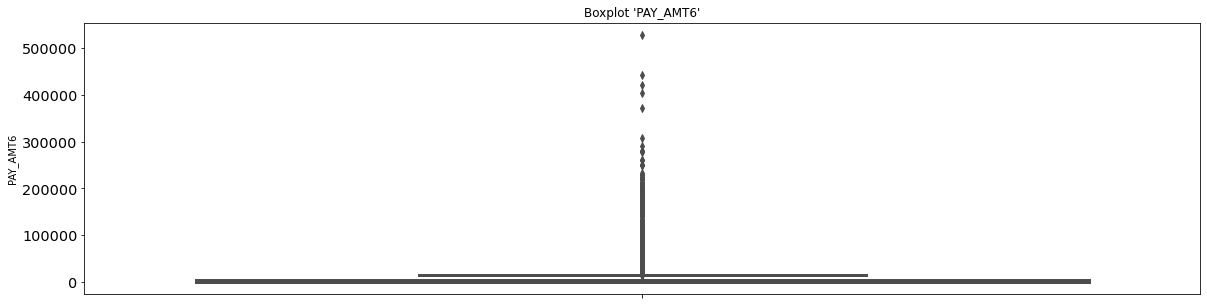

In [ ]:
# boxplot
for b in range(0, len(nums)):
  fig, axes = plt.subplots(ncols = 1, figsize = (20, 5))
  if df[nums[b]].skew() >= 1 or df[nums[b]].skew() <= -1 :
    sns.boxplot(y=df[nums[b]], whis=3, color='grey')
    axes.set_title(f"Boxplot '{nums[b]}'")
    plt.show()
  else:
    sns.boxplot(y=df[nums[b]], whis=1.5)
    axes.set_title(f"Boxplot '{nums[b]}'")
    
    plt.show()

Dilihat dari Skewness

In [ ]:
# skewness
for c in range(0, len(nums)):
  print(df[nums[c]].name + ' Skewness: ' + str(df[nums[c]].skew()))
  if -0.5 <= df[nums[c]].skew() <= 0.5:
    print("Columns '{}' normal distribution".format(nums[c]))
  elif df[nums[c]].skew() > 0.5:
    print("Columns '{}' right skewed".format(nums[c]))
  else:
    print("Columns '{}' left skewed".format(nums[c]))

LIMIT_BAL Skewness: 0.9745103517876318
Columns 'LIMIT_BAL' right skewed
AGE Skewness: 0.7378705206374702
Columns 'AGE' right skewed
BILL_AMT1 Skewness: 2.598669649556117
Columns 'BILL_AMT1' right skewed
BILL_AMT2 Skewness: 2.619080408089248
Columns 'BILL_AMT2' right skewed
BILL_AMT3 Skewness: 3.197614235340527
Columns 'BILL_AMT3' right skewed
BILL_AMT4 Skewness: 2.758930673032623
Columns 'BILL_AMT4' right skewed
BILL_AMT5 Skewness: 2.7427991401995615
Columns 'BILL_AMT5' right skewed
BILL_AMT6 Skewness: 2.752125088818241
Columns 'BILL_AMT6' right skewed
PAY_AMT1 Skewness: 15.601438498188797
Columns 'PAY_AMT1' right skewed
PAY_AMT2 Skewness: 33.3766499295203
Columns 'PAY_AMT2' right skewed
PAY_AMT3 Skewness: 15.703325140395034
Columns 'PAY_AMT3' right skewed
PAY_AMT4 Skewness: 12.691997486821753
Columns 'PAY_AMT4' right skewed
PAY_AMT5 Skewness: 11.139768568470844
Columns 'PAY_AMT5' right skewed
PAY_AMT6 Skewness: 10.477612820241392
Columns 'PAY_AMT6' right skewed


###IQR

In [ ]:
print('Jumlah baris sebelum outliers :',len(df))
for i in nums:
  Q3 = df[i].quantile(.75)
  Q1 = df[i].quantile(.25)

  IQR = Q3 - Q1

  upper = Q3 + (1.5 * IQR)
  lower = Q1 - (1.5 * IQR)

  outlier = df[(df[i] > lower) & (df[i] < upper)]

print('Jumlah baris sesudah outliers :',len(outlier))
print('percent of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

Jumlah baris sebelum outliers : 21000
Jumlah baris sesudah outliers : 18937
percent of outlier:  90.17619047619047 %


In [ ]:
print('Dataframe Before IQR: \n', df[nums].describe())
print('Dataframe After IQR: \n', outlier[nums].describe())

Dataframe Before IQR: 
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count   21000.000000  21000.000000   21000.000000   21000.000000   
mean   167214.746667     35.461619   51501.542381   49463.502667   
std    128965.188482      9.206628   73453.641859   70866.586004   
min     10000.000000     21.000000  -14386.000000  -69777.000000   
25%     50000.000000     28.000000    3564.750000    3000.000000   
50%    140000.000000     34.000000   22578.000000   21550.000000   
75%    240000.000000     41.000000   67876.250000   64918.250000   
max    800000.000000     75.000000  746814.000000  743970.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   4.723258e+04   43387.372476   40398.551095   38931.194000   
std    6.953988e+04   64081.073110   60396.811177   59196.499234   
min   -1.572640e+05 -170000.000000  -81334.000000 -209051.000000   
25%    2.686250e+03    

##Z-Score

In [ ]:
from scipy import stats

In [ ]:
# Menghapus outlier berdasarkan Z-score
filter = np.array([True] * len(df))

for x in nums:
    zscore = abs(stats.zscore(df[x])) 
    filter = (zscore < 3) & filter
    
df_zscore = df[filter] 
print('Jumlah baris sebelum outliers :',len(df))
print('Jumlah baris sesudah outliers :',len(df_zscore))

Jumlah baris sebelum outliers : 21000
Jumlah baris sesudah outliers : 18945


In [ ]:
print('Dataframe Before IQR: \n', df[nums].describe())
print('Dataframe After IQR: \n', df_zscore[nums].describe())

Dataframe Before IQR: 
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count   21000.000000  21000.000000   21000.000000   21000.000000   
mean   167214.746667     35.461619   51501.542381   49463.502667   
std    128965.188482      9.206628   73453.641859   70866.586004   
min     10000.000000     21.000000  -14386.000000  -69777.000000   
25%     50000.000000     28.000000    3564.750000    3000.000000   
50%    140000.000000     34.000000   22578.000000   21550.000000   
75%    240000.000000     41.000000   67876.250000   64918.250000   
max    800000.000000     75.000000  746814.000000  743970.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   4.723258e+04   43387.372476   40398.551095   38931.194000   
std    6.953988e+04   64081.073110   60396.811177   59196.499234   
min   -1.572640e+05 -170000.000000  -81334.000000 -209051.000000   
25%    2.686250e+03    

##Intepretasi

Berdasarkan dari hasil visualisasi menggunakkan boxplot, menghapus data point yang nilainya jauh berdasarkan z-score lebih efektif jika dibandingkan dengan menghapus oulier dengan metode IQR. Hal ini terjadi karena Z-Score merupakan ukuran berapa jauh standar deviasi dari mean sehingga penyebaran datanya lebih akurat.



##Feature Transformation

In [ ]:
from scipy.sparse import issparse

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import RobustScaler

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,Female,University,Single,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,Female,Graduate_School,Single,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,Female,University,Married,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,Female,University,Single,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,Male,High_School,Married,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [ ]:
df['age_norm'] = MinMaxScaler().fit_transform(df['AGE'].values.reshape(len(df), 1))

df['limitbal_norm'] = MinMaxScaler().fit_transform(df['LIMIT_BAL'].values.reshape(len(df), 1))

df['billamt1_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT1'].values.reshape(len(df), 1))
df['billamt1_std'] = StandardScaler().fit_transform(df['BILL_AMT1'].values.reshape(len(df), 1))

df['billamt2_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT2'].values.reshape(len(df), 1))
df['billamt2_std'] = StandardScaler().fit_transform(df['BILL_AMT2'].values.reshape(len(df), 1))

df['billamt3_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT3'].values.reshape(len(df), 1))
df['billamt3_std'] = StandardScaler().fit_transform(df['BILL_AMT3'].values.reshape(len(df), 1))

df['billamt4_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT4'].values.reshape(len(df), 1))
df['billamt4_std'] = StandardScaler().fit_transform(df['BILL_AMT4'].values.reshape(len(df), 1))

df['billamt5_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT5'].values.reshape(len(df), 1))
df['billamt5_std'] = StandardScaler().fit_transform(df['BILL_AMT5'].values.reshape(len(df), 1))

df['billamt6_norm'] = MinMaxScaler().fit_transform(df['BILL_AMT6'].values.reshape(len(df), 1))
df['billamt6_std'] = StandardScaler().fit_transform(df['BILL_AMT6'].values.reshape(len(df), 1))

df['payamt1_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT1'].values.reshape(len(df), 1))
df['payamt1_std'] = StandardScaler().fit_transform(df['PAY_AMT1'].values.reshape(len(df), 1))

df['payamt2_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT2'].values.reshape(len(df), 1))
df['payamt2_std'] = StandardScaler().fit_transform(df['PAY_AMT2'].values.reshape(len(df), 1))

df['payamt3_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT3'].values.reshape(len(df), 1))
df['payamt3_std'] = StandardScaler().fit_transform(df['PAY_AMT3'].values.reshape(len(df), 1))

df['payamt4_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT4'].values.reshape(len(df), 1))
df['payamt4_std'] = StandardScaler().fit_transform(df['PAY_AMT4'].values.reshape(len(df), 1))

df['payamt5_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT5'].values.reshape(len(df), 1))
df['payamt5_std'] = StandardScaler().fit_transform(df['PAY_AMT5'].values.reshape(len(df), 1))

df['payamt6_norm'] = MinMaxScaler().fit_transform(df['PAY_AMT6'].values.reshape(len(df), 1))
df['payamt6_std'] = StandardScaler().fit_transform(df['PAY_AMT6'].values.reshape(len(df), 1))

In [ ]:
df[['AGE', 'age_norm', 'LIMIT_BAL', 'limitbal_norm']].describe()

,AGE,age_norm,LIMIT_BAL,limitbal_norm
count,21000.000000,21000.000000,21000.000000,21000.000000
mean,35.461619,0.267808,167214.746667,0.199006
std,9.206628,0.170493,128965.188482,0.163247
min,21.000000,0.000000,10000.000000,0.000000
25%,28.000000,0.129630,50000.000000,0.050633
50%,34.000000,0.240741,140000.000000,0.164557
75%,41.000000,0.370370,240000.000000,0.291139
max,75.000000,1.000000,800000.000000,1.000000


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,payamt2_norm,payamt2_std,payamt3_norm,payamt3_std,payamt4_norm,payamt4_std,payamt5_norm,payamt5_std,payamt6_norm,payamt6_std
0,25150,360000,Female,University,Single,25,-1,-1,-1,-1,...,0.002066,-0.102221,0.003876,-0.103277,0.014283,0.263582,0.004833,-0.181865,0.051153,1.233518
1,13470,240000,Female,Graduate_School,Single,46,2,2,-2,-1,...,0.000000,-0.247732,0.002520,-0.174193,0.000000,-0.309896,0.005424,-0.165689,0.005815,-0.120787
2,3092,320000,Female,University,Married,41,0,0,0,0,...,0.001187,-0.164081,0.002250,-0.188305,0.004831,-0.115935,0.007177,-0.117685,0.002837,-0.209722
3,13973,50000,Female,University,Single,24,-1,-1,-2,-2,...,0.000000,-0.247732,0.000000,-0.305911,0.000000,-0.309896,0.000000,-0.314153,0.000000,-0.294475
4,10567,80000,Male,High_School,Married,52,-1,0,0,0,...,0.000891,-0.184994,0.001687,-0.217707,0.001655,-0.243432,0.002096,-0.256784,0.002741,-0.212604


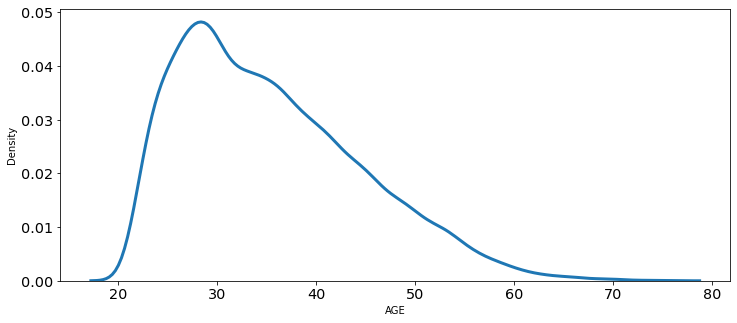

In [ ]:
sns.kdeplot(df['AGE'])

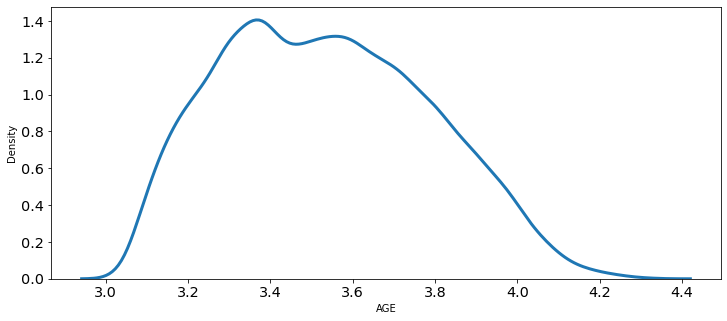

In [ ]:
sns.kdeplot(np.log(df['AGE']))

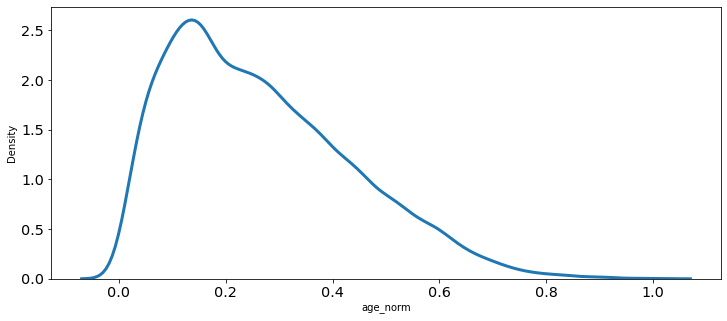

In [ ]:
sns.kdeplot(df['age_norm'])

In [ ]:
df['log_age'] = np.log(df['AGE'])

df = df.drop(columns = 'AGE')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,payamt2_std,payamt3_norm,payamt3_std,payamt4_norm,payamt4_std,payamt5_norm,payamt5_std,payamt6_norm,payamt6_std,log_age
0,25150,360000,Female,University,Single,-1,-1,-1,-1,-1,...,-0.102221,0.003876,-0.103277,0.014283,0.263582,0.004833,-0.181865,0.051153,1.233518,3.218876
1,13470,240000,Female,Graduate_School,Single,2,2,-2,-1,0,...,-0.247732,0.002520,-0.174193,0.000000,-0.309896,0.005424,-0.165689,0.005815,-0.120787,3.828641
2,3092,320000,Female,University,Married,0,0,0,0,0,...,-0.164081,0.002250,-0.188305,0.004831,-0.115935,0.007177,-0.117685,0.002837,-0.209722,3.713572
3,13973,50000,Female,University,Single,-1,-1,-2,-2,-2,...,-0.247732,0.000000,-0.305911,0.000000,-0.309896,0.000000,-0.314153,0.000000,-0.294475,3.178054
4,10567,80000,Male,High_School,Married,-1,0,0,0,0,...,-0.184994,0.001687,-0.217707,0.001655,-0.243432,0.002096,-0.256784,0.002741,-0.212604,3.951244


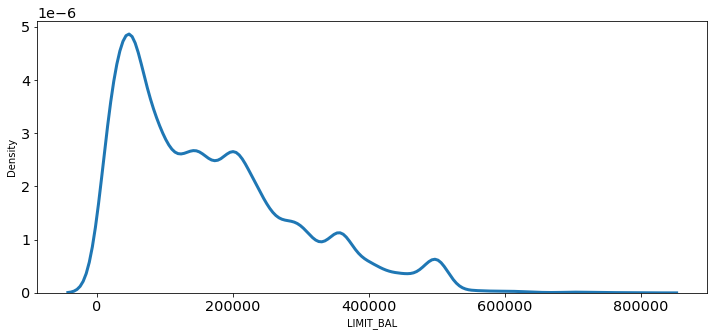

In [ ]:
sns.kdeplot(df['LIMIT_BAL'])

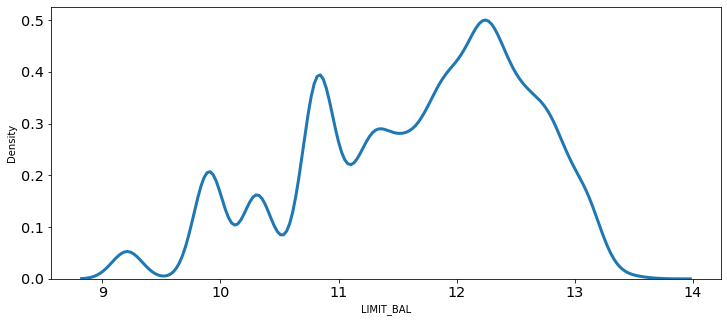

In [ ]:
sns.kdeplot(np.log(df['LIMIT_BAL']))

df['log_limitbal'] = np.log(df['LIMIT_BAL'])

df = df.drop(columns = 'LIMIT_BAL')

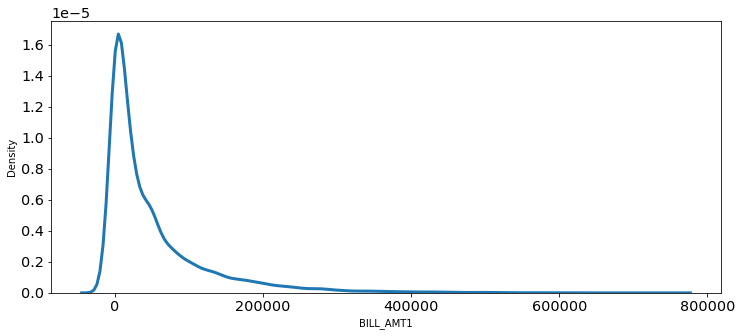

In [ ]:
sns.kdeplot(df['BILL_AMT1'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


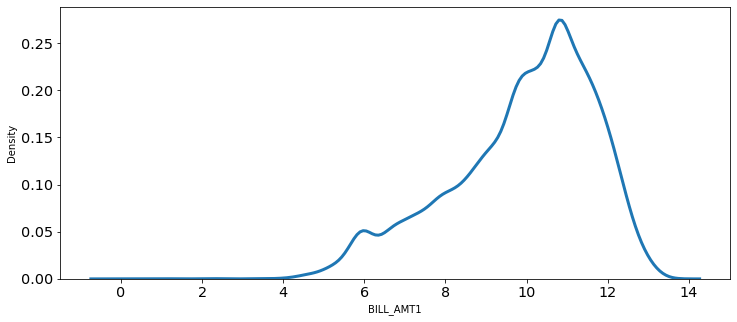

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT1']))

df['log_billamt1'] = np.log(df['BILL_AMT1'])

df = df.drop(columns = 'BILL_AMT1')

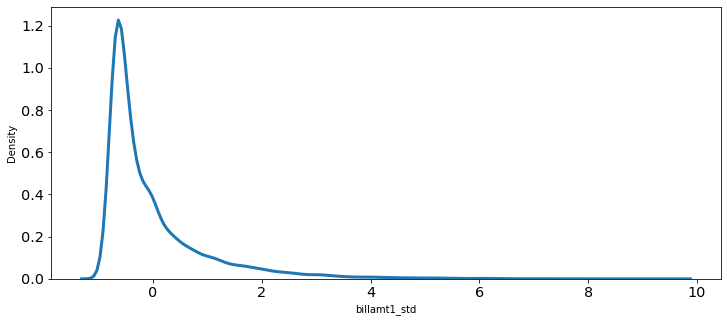

In [ ]:
sns.kdeplot(df['billamt1_std'])

<ipython-input-252-859cd6ae6005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt1'] = RobustScaler().fit_transform(df_zscore['BILL_AMT1'].values.reshape(len(df_zscore), 1))


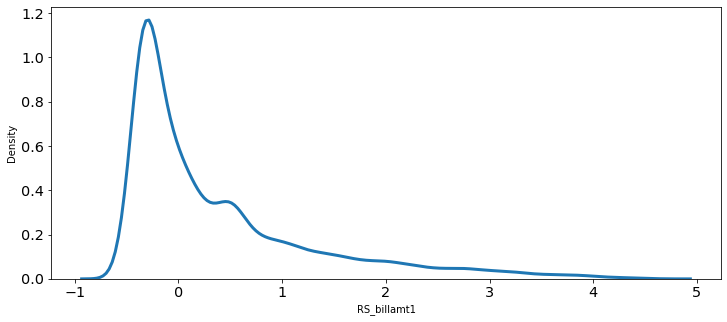

In [ ]:
df_zscore['RS_billamt1'] = RobustScaler().fit_transform(df_zscore['BILL_AMT1'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt1'])

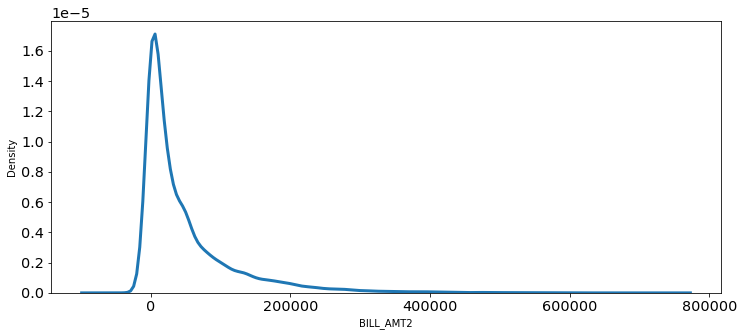

In [ ]:
sns.kdeplot(df['BILL_AMT2'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


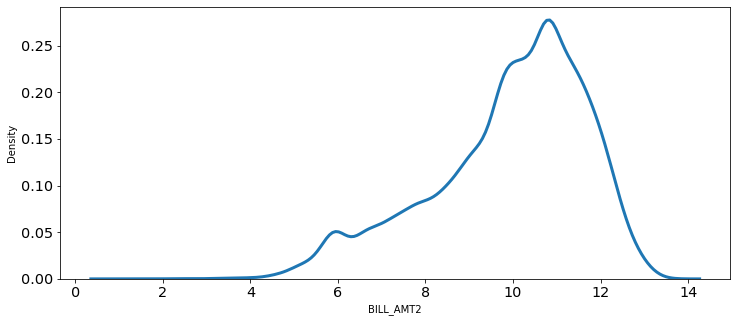

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT2']))

df['log_billamt2'] = np.log(df['BILL_AMT2'])

df = df.drop(columns = 'BILL_AMT2')

<ipython-input-255-99d462d6c198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt2'] = RobustScaler().fit_transform(df_zscore['BILL_AMT2'].values.reshape(len(df_zscore), 1))


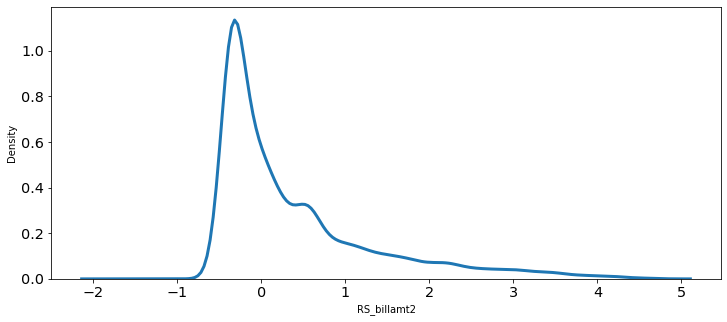

In [ ]:
df_zscore['RS_billamt2'] = RobustScaler().fit_transform(df_zscore['BILL_AMT2'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt2'])

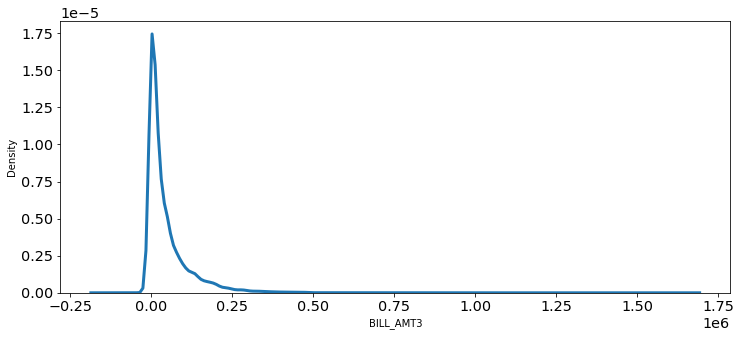

In [ ]:
sns.kdeplot(df['BILL_AMT3'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


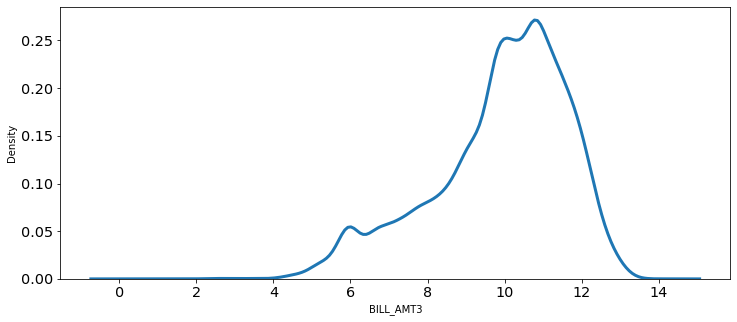

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT3']))

df['log_billamt3'] = np.log(df['BILL_AMT3'])

df = df.drop(columns = 'BILL_AMT3')

<ipython-input-259-f1fc5967277a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt3'] = RobustScaler().fit_transform(df_zscore['BILL_AMT3'].values.reshape(len(df_zscore), 1))


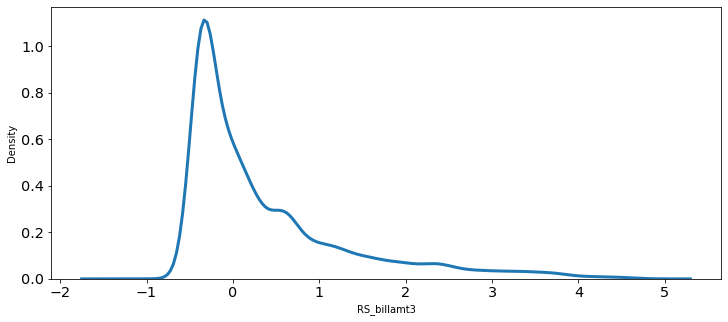

In [ ]:
df_zscore['RS_billamt3'] = RobustScaler().fit_transform(df_zscore['BILL_AMT3'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt3'])

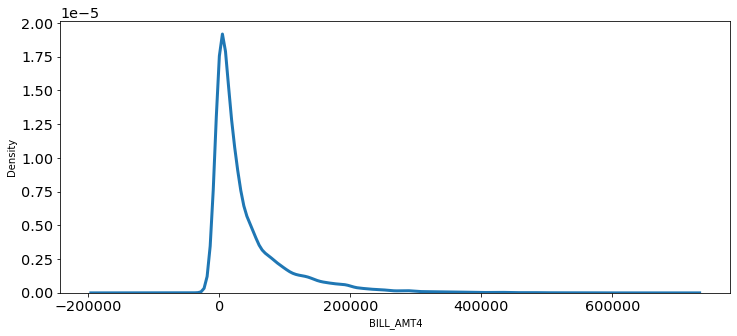

In [ ]:
sns.kdeplot(df['BILL_AMT4'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


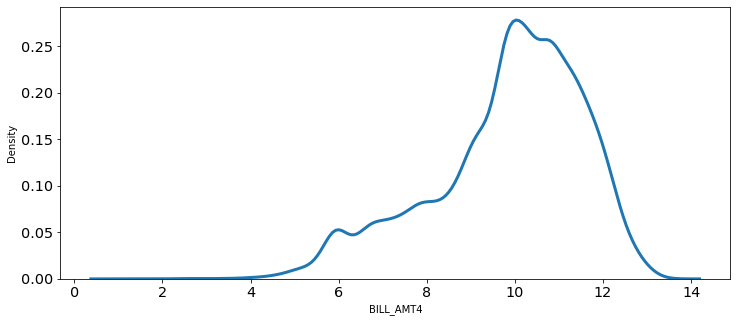

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT4']))

df['log_billamt4'] = np.log(df['BILL_AMT4'])

df = df.drop(columns = 'BILL_AMT4')

<ipython-input-262-1d66285979e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt4'] = RobustScaler().fit_transform(df_zscore['BILL_AMT4'].values.reshape(len(df_zscore), 1))


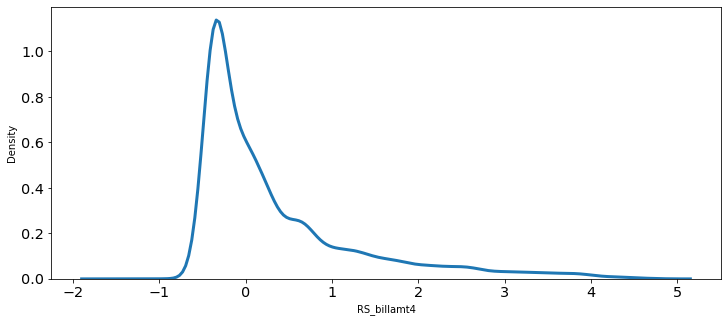

In [ ]:
df_zscore['RS_billamt4'] = RobustScaler().fit_transform(df_zscore['BILL_AMT4'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt4'])

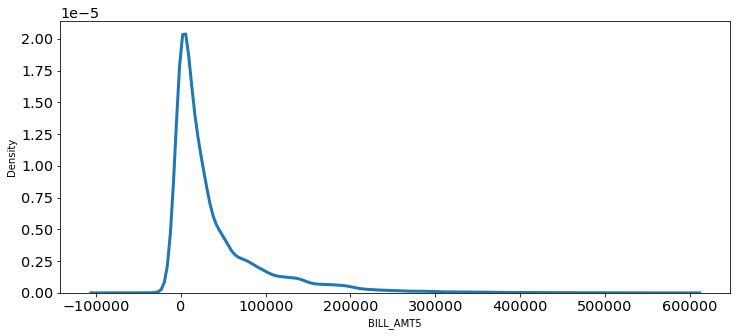

In [ ]:
sns.kdeplot(df['BILL_AMT5'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


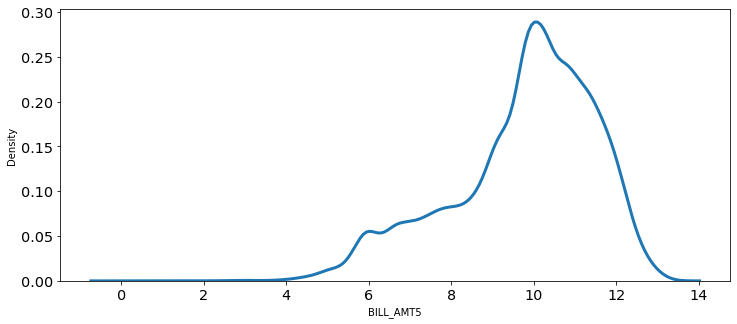

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT5']))

df['log_billamt5'] = np.log(df['BILL_AMT5'])

df = df.drop(columns = 'BILL_AMT5')

<ipython-input-265-344e1edb2bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt5'] = RobustScaler().fit_transform(df_zscore['BILL_AMT5'].values.reshape(len(df_zscore), 1))


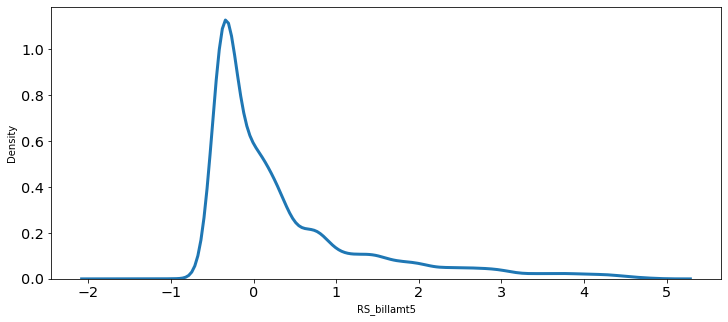

In [ ]:
df_zscore['RS_billamt5'] = RobustScaler().fit_transform(df_zscore['BILL_AMT5'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt5'])

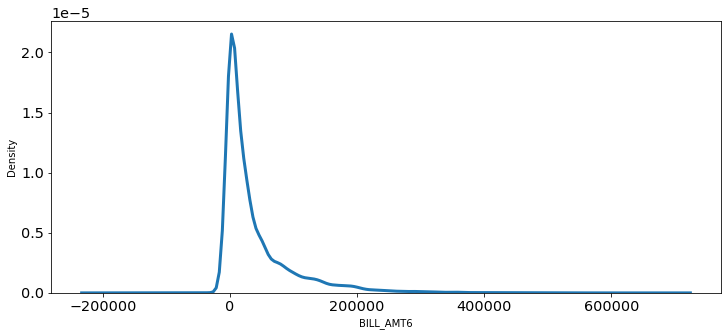

In [ ]:
sns.kdeplot(df['BILL_AMT6'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


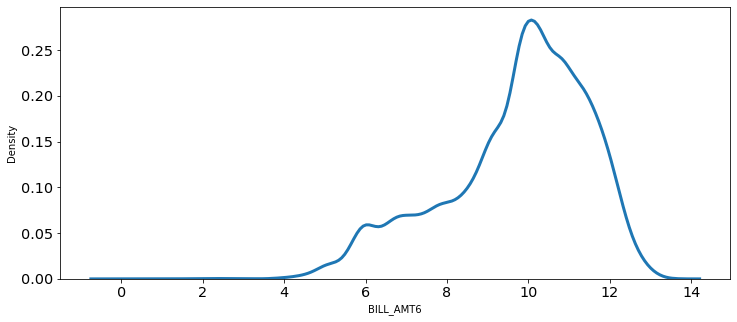

In [ ]:
sns.kdeplot(np.log(df['BILL_AMT6']))

df['log_billamt6'] = np.log(df['BILL_AMT6'])

df = df.drop(columns = 'BILL_AMT6')

<ipython-input-268-a033da71bf83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_billamt6'] = RobustScaler().fit_transform(df_zscore['BILL_AMT6'].values.reshape(len(df_zscore), 1))


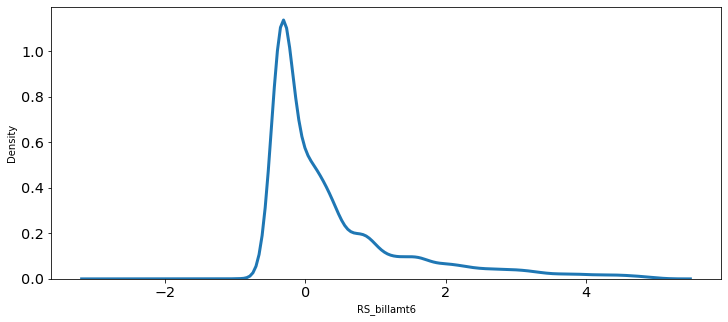

In [ ]:
df_zscore['RS_billamt6'] = RobustScaler().fit_transform(df_zscore['BILL_AMT6'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_billamt6'])

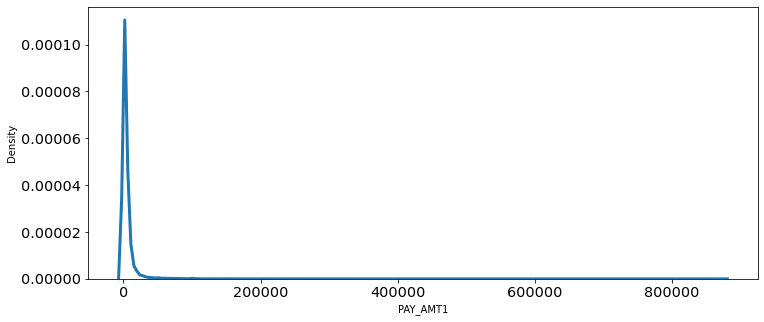

In [ ]:
sns.kdeplot(df['PAY_AMT1'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


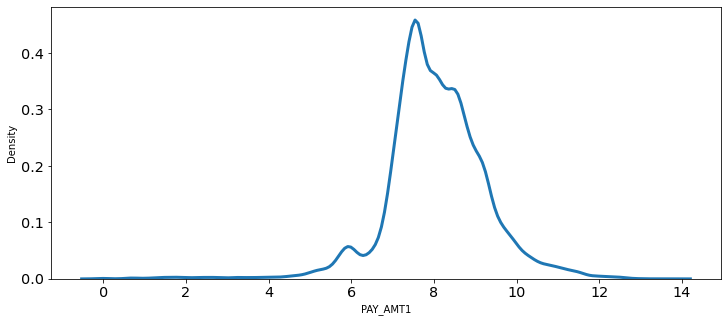

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT1']))

df['log_payamt1'] = np.log(df['PAY_AMT1'])

df = df.drop(columns = 'PAY_AMT1')

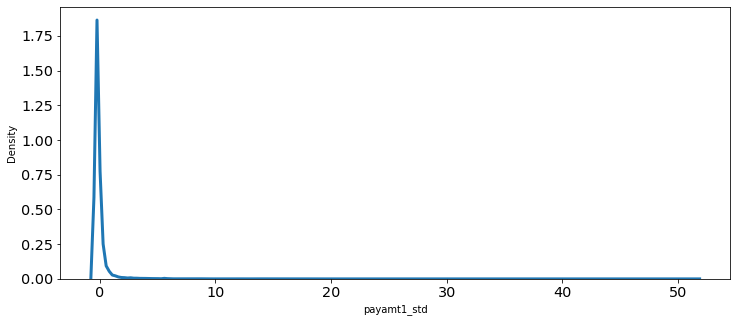

In [ ]:
sns.kdeplot(df['payamt1_std'])

<ipython-input-271-914569d5fa55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt1'] = RobustScaler().fit_transform(df_zscore['PAY_AMT1'].values.reshape(len(df_zscore), 1))


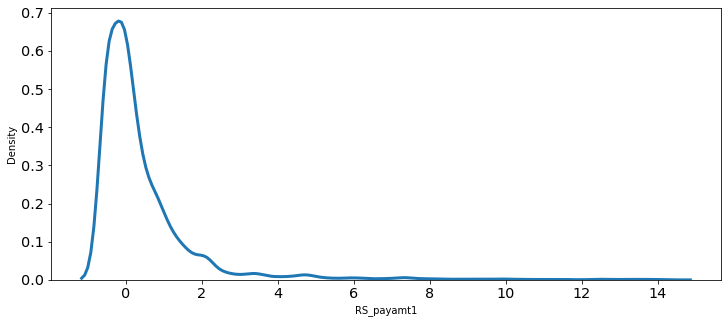

In [ ]:
df_zscore['RS_payamt1'] = RobustScaler().fit_transform(df_zscore['PAY_AMT1'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt1'])

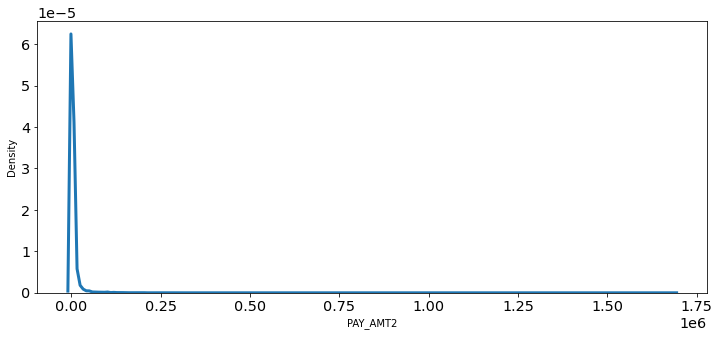

In [ ]:
sns.kdeplot(df['PAY_AMT2'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


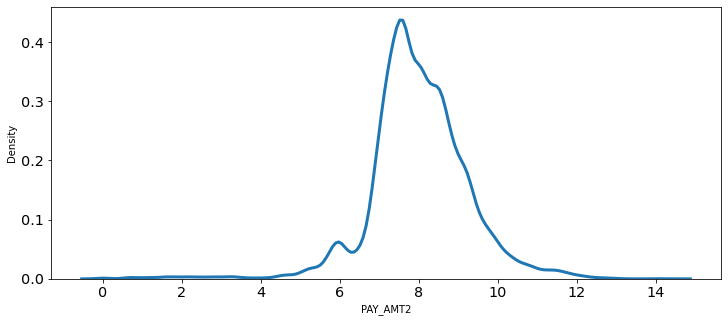

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT2']))

df['log_payamt2'] = np.log(df['PAY_AMT2'])

df = df.drop(columns = 'PAY_AMT2')

<ipython-input-274-2f8108639bc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt2'] = RobustScaler().fit_transform(df_zscore['PAY_AMT2'].values.reshape(len(df_zscore), 1))


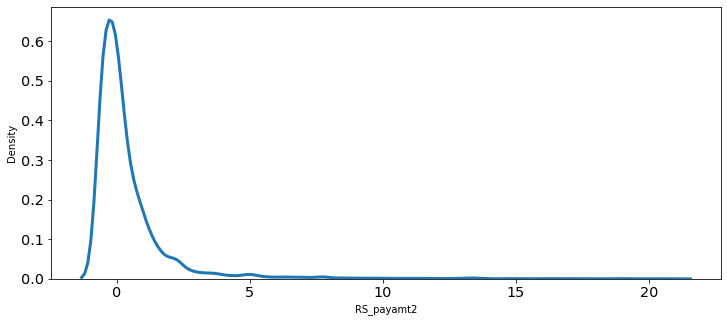

In [ ]:
df_zscore['RS_payamt2'] = RobustScaler().fit_transform(df_zscore['PAY_AMT2'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt2'])

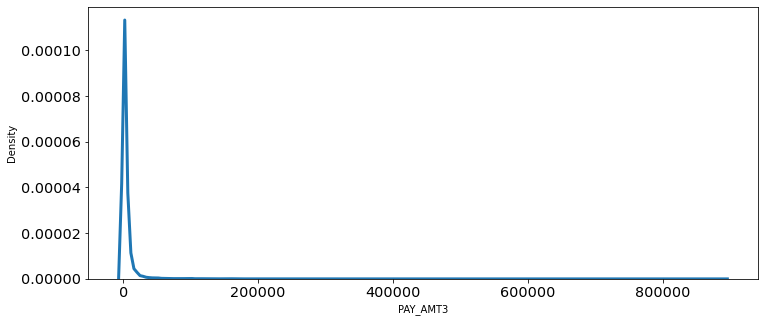

In [ ]:
sns.kdeplot(df['PAY_AMT3'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


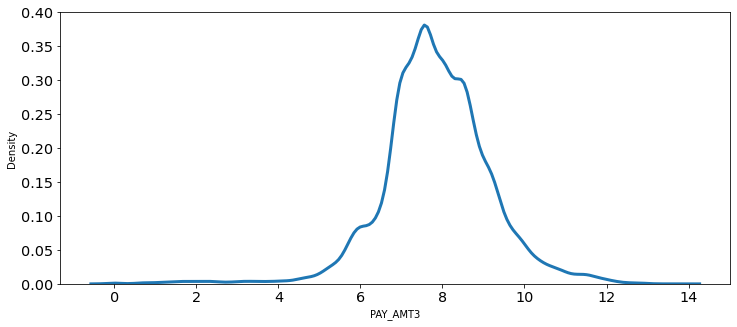

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT3']))

df['log_payamt3'] = np.log(df['PAY_AMT3'])

df = df.drop(columns = 'PAY_AMT3')

<ipython-input-277-66fda565ed48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt3'] = RobustScaler().fit_transform(df_zscore['PAY_AMT3'].values.reshape(len(df_zscore), 1))


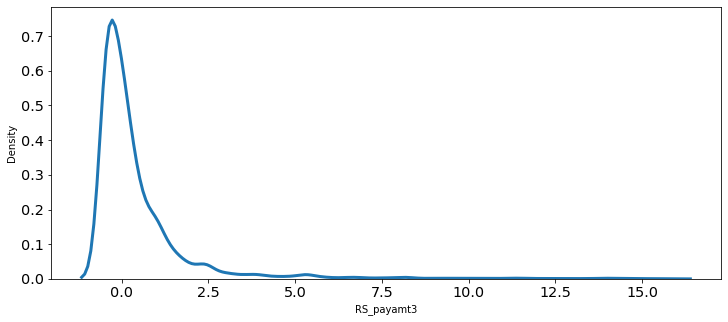

In [ ]:
df_zscore['RS_payamt3'] = RobustScaler().fit_transform(df_zscore['PAY_AMT3'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt3'])

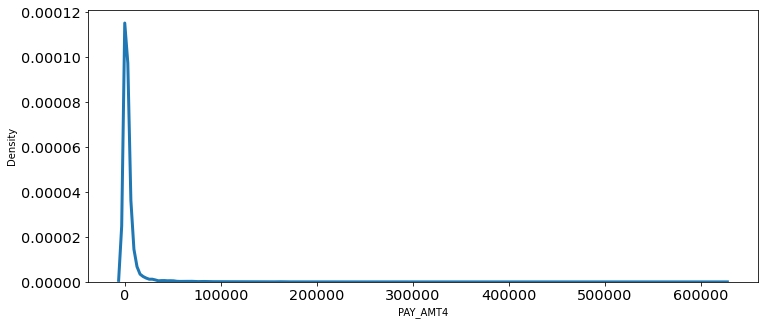

In [ ]:
sns.kdeplot(df['PAY_AMT4'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


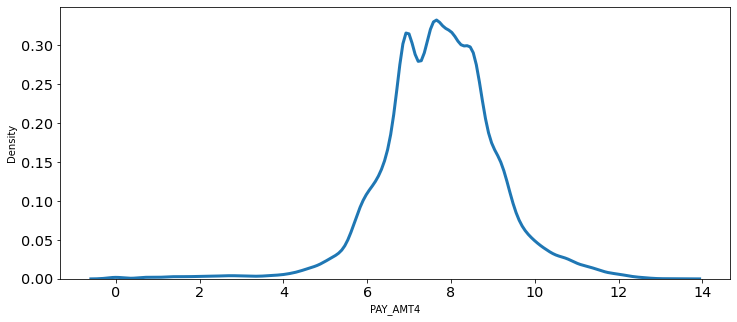

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT4']))

df['log_payamt4'] = np.log(df['PAY_AMT4'])

df = df.drop(columns = 'PAY_AMT4')

<ipython-input-280-5f559c4256fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt4'] = RobustScaler().fit_transform(df_zscore['PAY_AMT4'].values.reshape(len(df_zscore), 1))


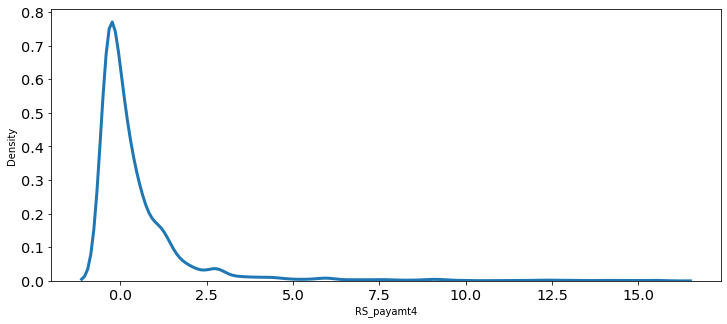

In [ ]:
df_zscore['RS_payamt4'] = RobustScaler().fit_transform(df_zscore['PAY_AMT4'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt4'])

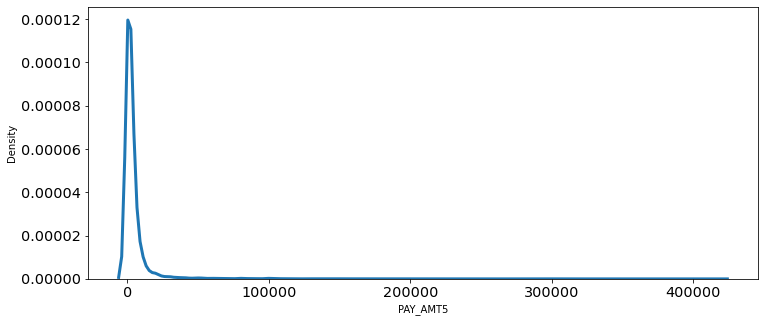

In [ ]:
sns.kdeplot(df['PAY_AMT5'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


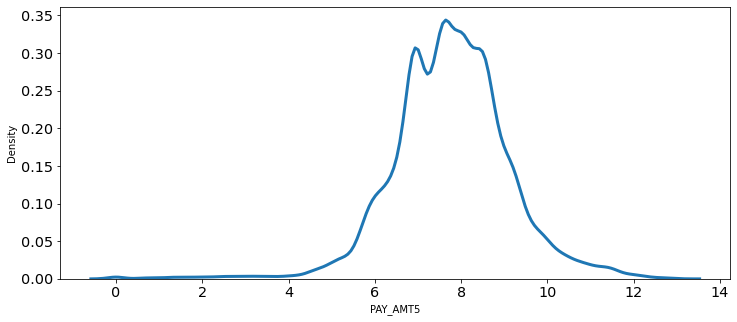

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT5']))

df['log_payamt5'] = np.log(df['PAY_AMT5'])

df = df.drop(columns = 'PAY_AMT5')

<ipython-input-283-372c7b4b36f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt5'] = RobustScaler().fit_transform(df_zscore['PAY_AMT5'].values.reshape(len(df_zscore), 1))


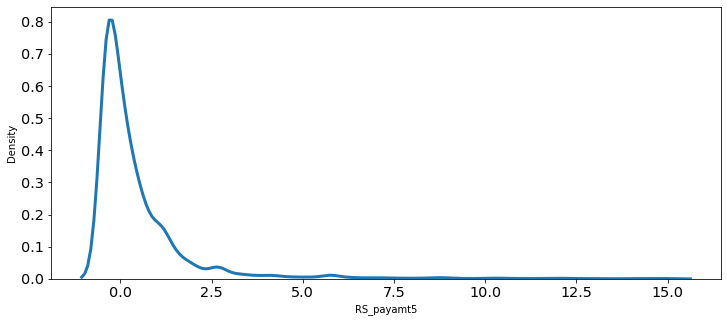

In [ ]:
df_zscore['RS_payamt5'] = RobustScaler().fit_transform(df_zscore['PAY_AMT5'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt5'])

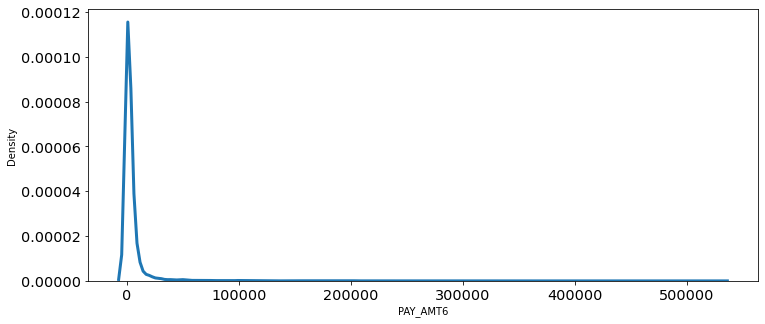

In [ ]:
sns.kdeplot(df['PAY_AMT6'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


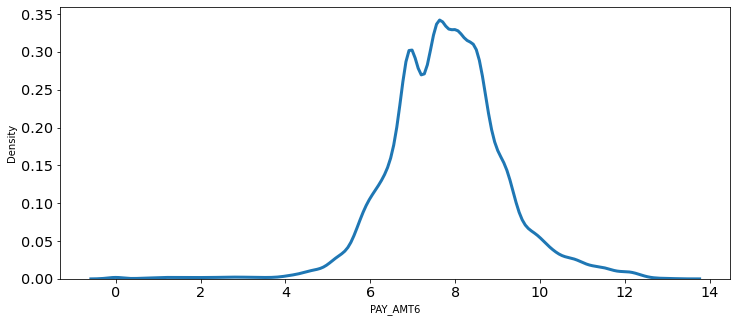

In [ ]:
sns.kdeplot(np.log(df['PAY_AMT6']))

df['log_payamt6'] = np.log(df['PAY_AMT6'])

df = df.drop(columns = 'PAY_AMT6')

<ipython-input-286-8c9942b1399d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore['RS_payamt6'] = RobustScaler().fit_transform(df_zscore['PAY_AMT6'].values.reshape(len(df_zscore), 1))


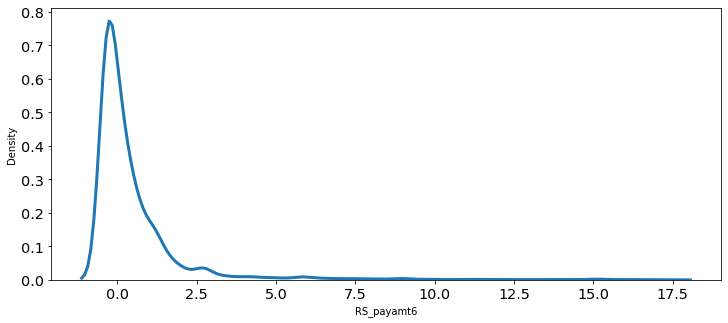

In [ ]:
df_zscore['RS_payamt6'] = RobustScaler().fit_transform(df_zscore['PAY_AMT6'].values.reshape(len(df_zscore), 1))

sns.kdeplot(df_zscore['RS_payamt6'])

##FEATURE ENCODING

In [ ]:
df.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,log_billamt3,log_billamt4,log_billamt5,log_billamt6,log_payamt1,log_payamt2,log_payamt3,log_payamt4,log_payamt5,log_payamt6
0,25150,Female,University,Single,-1,-1,-1,-1,-1,-1,...,8.154500,8.141772,9.090430,7.610853,9.440658,8.154500,8.144969,9.090430,7.610853,10.205183
1,13470,Female,Graduate_School,Single,2,2,-2,-1,0,-1,...,-inf,7.714231,7.427144,7.726213,-inf,-inf,7.714231,-inf,7.726213,8.030735
2,3092,Female,University,Married,0,0,0,0,0,0,...,10.564034,10.474721,10.464131,10.489578,8.517193,7.600902,7.600902,8.006368,8.006368,7.313220
3,13973,Female,University,Single,-1,-1,-2,-2,-2,-2,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
4,10567,Male,High_School,Married,-1,0,0,0,0,0,...,9.872255,9.931151,9.964630,9.973806,7.313220,7.313220,7.313220,6.935370,6.775366,7.278629


In [ ]:
mapping_sex = {
    'Male' : 0,
    'Female' : 1
}

df['SEX'] = df['SEX'].map(mapping_sex)

df.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,log_billamt3,log_billamt4,log_billamt5,log_billamt6,log_payamt1,log_payamt2,log_payamt3,log_payamt4,log_payamt5,log_payamt6
0,25150,1,University,Single,-1,-1,-1,-1,-1,-1,...,8.154500,8.141772,9.090430,7.610853,9.440658,8.154500,8.144969,9.090430,7.610853,10.205183
1,13470,1,Graduate_School,Single,2,2,-2,-1,0,-1,...,-inf,7.714231,7.427144,7.726213,-inf,-inf,7.714231,-inf,7.726213,8.030735
2,3092,1,University,Married,0,0,0,0,0,0,...,10.564034,10.474721,10.464131,10.489578,8.517193,7.600902,7.600902,8.006368,8.006368,7.313220
3,13973,1,University,Single,-1,-1,-2,-2,-2,-2,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
4,10567,0,High_School,Married,-1,0,0,0,0,0,...,9.872255,9.931151,9.964630,9.973806,7.313220,7.313220,7.313220,6.935370,6.775366,7.278629


In [ ]:
mapping_education = {
    'High_School' : 0,
    'Graduate_School' : 1,
    'University' : 2,
    'Others' : 3
}

df['EDUCATION'] = df['EDUCATION'].map(mapping_education)

df.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,log_billamt3,log_billamt4,log_billamt5,log_billamt6,log_payamt1,log_payamt2,log_payamt3,log_payamt4,log_payamt5,log_payamt6
0,25150,1,2,Single,-1,-1,-1,-1,-1,-1,...,8.154500,8.141772,9.090430,7.610853,9.440658,8.154500,8.144969,9.090430,7.610853,10.205183
1,13470,1,1,Single,2,2,-2,-1,0,-1,...,-inf,7.714231,7.427144,7.726213,-inf,-inf,7.714231,-inf,7.726213,8.030735
2,3092,1,2,Married,0,0,0,0,0,0,...,10.564034,10.474721,10.464131,10.489578,8.517193,7.600902,7.600902,8.006368,8.006368,7.313220
3,13973,1,2,Single,-1,-1,-2,-2,-2,-2,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
4,10567,0,0,Married,-1,0,0,0,0,0,...,9.872255,9.931151,9.964630,9.973806,7.313220,7.313220,7.313220,6.935370,6.775366,7.278629


In [ ]:
for i in ['MARRIAGE', 'PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] : 
  OHC = pd.get_dummies(df[i], prefix = i)
  df = df.join(OHC)



In [ ]:
df.head()

,ID,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,25150,Female,University,Single,-1,-1,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,0
1,13470,Female,Graduate_School,Single,2,2,-2,-1,0,-1,...,0,1,0,0,0,0,0,0,0,0
2,3092,Female,University,Married,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,13973,Female,University,Single,-1,-1,-2,-2,-2,-2,...,1,0,0,0,0,0,0,0,0,0
4,10567,Male,High_School,Married,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Handle class imbalance